# 2019 DSC AWS Learning Group
### Titanic: Machine Learning from Disaster
### https://www.kaggle.com/c/titanic

# Load Libraries

In [1]:
# Pandas is the most popular library for data manipulation and analysis
import pandas as pd

# Numpy is a powerful library for doing mathematical operations
import numpy as np

# Matplotlib is a plotting library
from matplotlib import pyplot as plt
import seaborn as sns

# This magic (%) command enables charts created by matplotlib can be shown in the jupyter notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
import warnings ## importing warnings library.
warnings.filterwarnings('ignore') ## Ignore warning

# Exploratory Data Analysis

In [2]:
# Import the datasets
train = pd.read_csv('https://raw.githubusercontent.com/DataScienceClub777/DSC/master/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/DataScienceClub777/DSC/master/titanic_test.csv')

In [3]:
# Inspect the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Inspect the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Let's dig a little deeper
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# What are some summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# How many missing values are there?
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

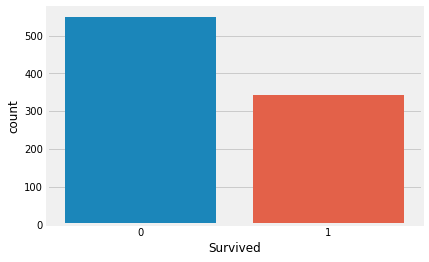

In [8]:
# Is our dataset balanced?
sns.countplot('Survived',data=train)
plt.show()

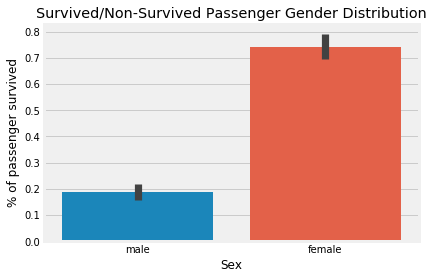

In [9]:
# Let's examine the survival rate by gender
sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train)
plt.title("Survived/Non-Survived Passenger Gender Distribution")
plt.ylabel("% of passenger survived")
plt.xlabel("Sex");

Text(0.5,1,'Survived/Non-Survived Passenger Gender Distribution')

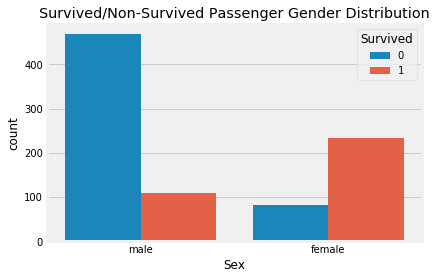

In [10]:
# More detail on survival rate by gender
sns.countplot(x = "Sex", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution")

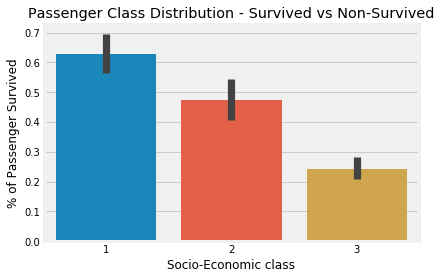

In [11]:
# What about survival rate by socio-economic class?
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived")
plt.xlabel("Socio-Economic class");
plt.ylabel("% of Passenger Survived");
labels = ['Upper', 'Middle', 'Lower']

Text(0.5,1,'Survived/Non-Survived Embarkation Distribution')

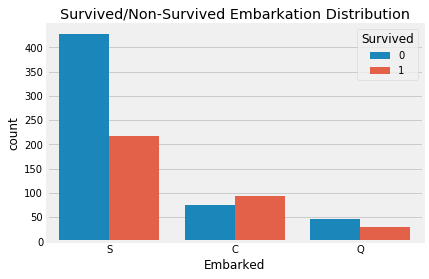

In [12]:
# How about survival rate based on where passengers embarked?
sns.countplot(x = "Embarked", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Embarkation Distribution")

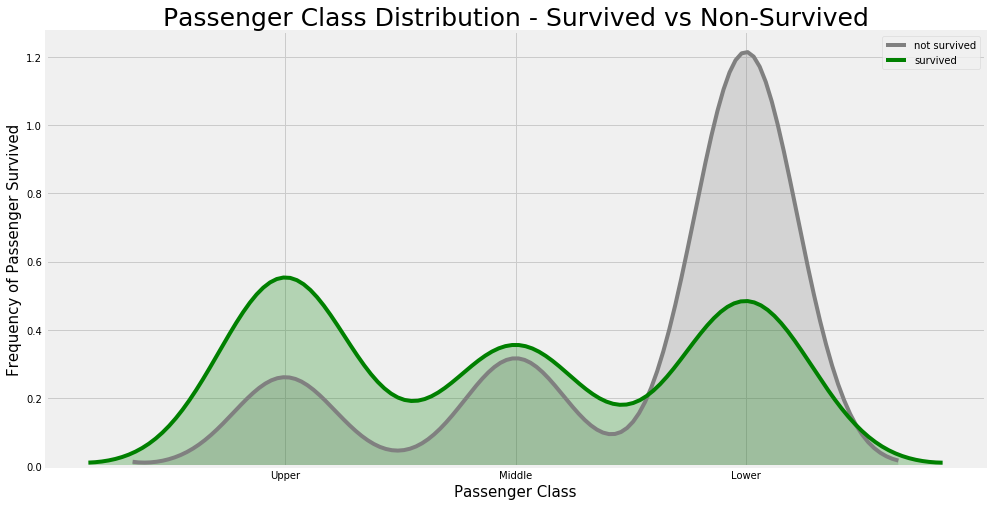

In [13]:
# Let's create a kernal density plot to further examine survival rate by socio economic class
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)

# Convert xticks into words
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

Text(0.5,0,'Passenger Age')

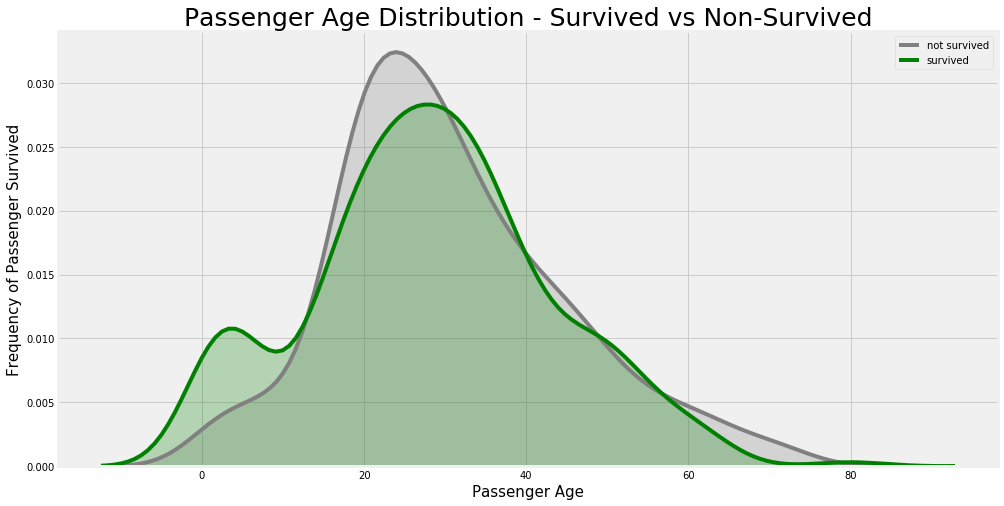

In [14]:
# Let's create a kernal density plot to examine survival rate by age
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Age[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Age Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Age", fontsize = 15)

# Feature Engineering Preview
let's add a feature that splits between children and adults since we see a clear relationship between age and survival rate

In [15]:
# Create a column Child and assign to 'NaN'
train['Child'] = float('NaN')

# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column
train['Child'][train['Age'] >= 18] = 1
train['Child'][train['Age'] < 18] = 0
print(train["Child"].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Child, dtype: float64


In [16]:
# Print the Survival Rates for passengers under 18
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

0    0.618968
1    0.381032
Name: Survived, dtype: float64


In [17]:
# Print the Survival Rates for passengers 18 or older
print(train["Survived"][train["Child"] == 0].value_counts(normalize = True))

1    0.539823
0    0.460177
Name: Survived, dtype: float64


Text(0.5,1,'Survived/Non-Survived Passenger Age Distribution')

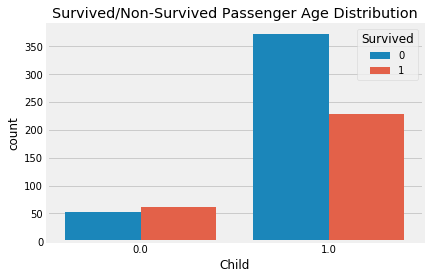

In [18]:
# Let's visualize our newly defined survival rate for children and adults
sns.countplot(x = "Child", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Passenger Age Distribution")

# Cleaning the data

In [19]:
# Let's get a reminder for the missing values in our dataset
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
print(pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent']))

             Total  Percent
Cabin          687    77.10
Child          177    19.87
Age            177    19.87
Embarked         2     0.22
Fare             0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
Survived         0     0.00
PassengerId      0     0.00


In [20]:
# Let's check on the test set
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
print(pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent']))

             Total  Percent
Cabin          327    78.23
Age             86    20.57
Fare             1     0.24
Embarked         0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
PassengerId      0     0.00


In [21]:
# We see that both our training and test set have similar missing values.
# Let's make an effort to fill these missing values

# In our training set there are 2 missing values for Embarked
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))

total.columns = ["Total"]
percent.columns = ['Percent']
print(pd.concat([total, percent], axis = 1))

     Total  Percent
S      644    72.28
C      168    18.86
Q       77     8.64
NaN      2     0.22


In [22]:
# We could impute the Embarked variable using the most common class of embarkation which is "S" 
# using the commented line of code below.
# train['Embarked'] = train['Embarked'].fillna('S')

# Or we could dig a little deeper and examine the two null values
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0


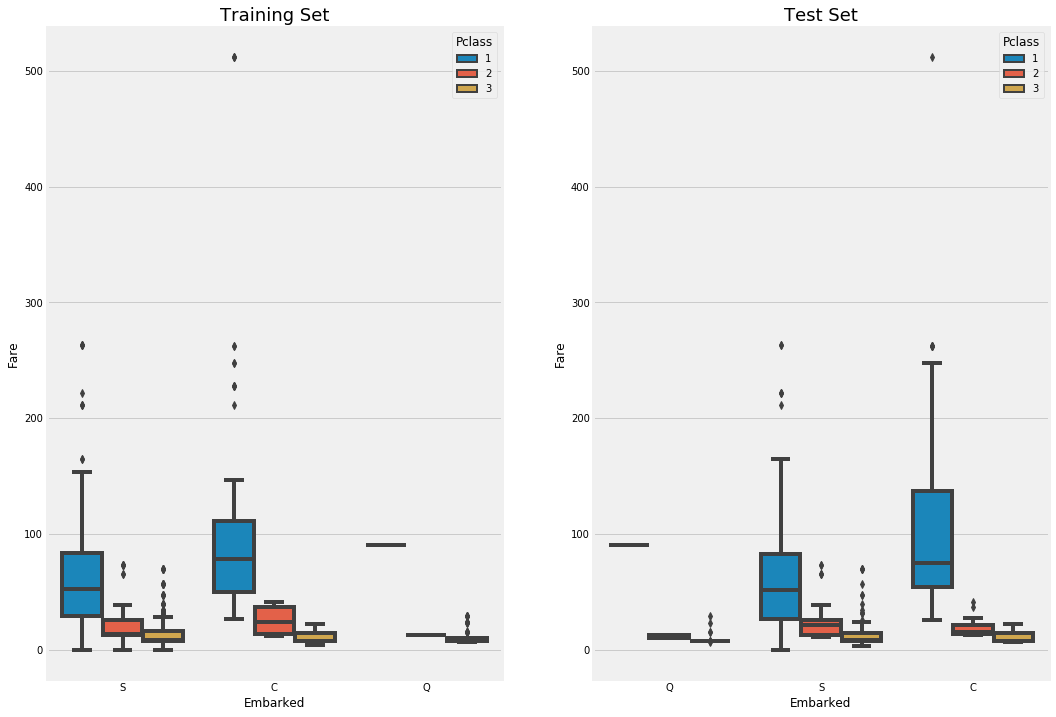

In [23]:
# We may be able to solve these two missing values by looking at other indepedent variables for our two observations.
# As shown above both passengers paid a fare of $80, are of Pclass 1 and female.
# Let's take a look at how Fare is distributed among all Pclass and Embarked features.

fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

In [24]:
# It looks like the average fare closest to $80 in Pclass 1 is in the C Embarked values
# Let's fill in the missing values as "C"
train.Embarked.fillna('C', inplace=True)

In [25]:
# Let's take a look at age which has about 20% missing values
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


A standard approach for dealing with null values would be imputing mean, median or mode.  However, a large amount of age data is missing and we suspect it to be promising in deteremining survival rate, so we will use a Random Forest Regressor later in the Feature Engineering section to impute a missing value rather than simply select the mean, median or mode. We will leave the age column unchanged for now.

In [26]:
# Let's examine the cabin variable which has 77-78% missing values
print ("Train Cabin missing value: " + str((train.Cabin.isnull().sum()/len(train))*100)+str("%"))
print ("Test Cabin missing value: " + str((test.Cabin.isnull().sum()/len(test))*100)+str("%"))

Train Cabin missing value: 77.10437710437711%
Test Cabin missing value: 78.22966507177034%


Because so many observations are missing we could either get rid of the whole feature, or
we can brainstorm a little and find an appropriate way to put it to use.  For example, We may say passengers with cabin records had a higher socio-economic-status then others.  We may also say passengers with cabin records were more likely to be taken into consideration when loading into the boat.

In [27]:
# Let's combine train and test data and for now we will assign all the null values as "N"

# Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

# Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [28]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [29]:
# Remember we just assigned N to all null Cabin values, we will use information from records with Cabin values
# to imput Cabin values for the rest
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

#  Let's examine average fare by Cabin value, remember N means null
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [30]:
# Let's define a function to assign a cabin value for our null observations 
# based on average fare for our non-null records
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

In [31]:
# Apply cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

In [32]:
# getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

# PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

# Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

# How many missing values are there now?
train.isnull().sum()

Age            177
Cabin            0
Child          177
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Ticket           0
Survived         0
dtype: int64

In [33]:
# Let's examine the remaining missing values in our train set
train[train['Age'].isnull()].head()

# We can see below that our records with null values for Age also have null values for the child feature we 
# engineered.  This is not suprising given our logic for assigning child/adult wassed on Age being non-null.
# We will account for this later when we fill in the remaining null age values

,Age,Cabin,Child,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Survived
5,NaN,G,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,330877,0
17,NaN,G,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,244373,1
19,NaN,G,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,2649,1
26,NaN,G,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,2631,0
28,NaN,G,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,330959,1


In [34]:
# Remember we had 1 missing fare value in our test set, let's correct that.
test[test.Fare.isnull()]

,Age,Cabin,Child,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
152,60.5,B,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,3701


In [35]:
# We could take the simple approach and impute the average fare amount for our null value.  However, that might not 
# be the best way to fill this value.  We can be a little more specific and take the average where Pclass is 3, Sex
# is male and Embarked is S.

missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
test.Fare.fillna(missing_value, inplace=True)

# Statistical Analysis

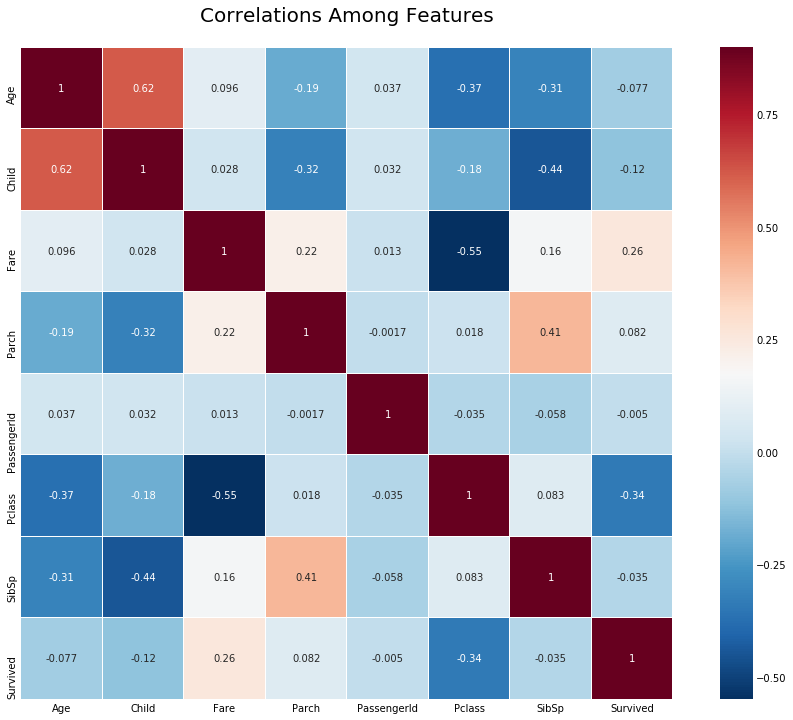

In [36]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# Feature Engineering

Sometimes we may want to create extra features from within the features that we already have, sometimes we want to remove features that are alike.  It is important to remember that we will try to create new features in such ways that will not cause multicollinearity to occur.

Earlier in our expectations exercise we hypothesized that passenger name may have some predictive power in determining survival.  In order to test this we will neeed to create some new features.

In [37]:
# Create a new feature "name_length" that will take the count of letters of each name
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'long'
    else:
        a = 'extra_long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [38]:
# Create a new feature "title"
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

We also hypothesized that passengers with a larger family size may have been less likely to survive.  We can create new features to test this.

In [39]:
# Family size feature
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

Sometimes we may want to remove a feature that isn't meaningful.  The ticket feature may contain important information, but let's ignore it for now.  We may come back to it later.

In [40]:
# What does the ticket feature look like?
train.Ticket.value_counts().sample(10)

# Remove the ticket feature
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

It seems like passenger ID doesn'nt contain any meaningful information.  Let's remove it

In [ ]:
# Remove Passenger ID
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

Some of the passengers travelled in groups of family or friends.  It seems like the Fare column kept a record for the total fare rather than the fare of an individual passenger.  Therefore, it may make sense to calculate individual passenger fares.

In [41]:
# Calcule fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [42]:
# Let's create a function to bucket by fare amount.
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)